## CRAWLING DATA


In [1]:
from googleapiclient.discovery import build
import csv
import pandas as pd

# === Konfigurasi ===
api_key = "Masukkan API Key Google Cloud"
youtube = build('youtube', 'v3', developerKey=api_key)

def get_video_comments(video_id, max_comments):
    comments = []
    next_page_token = None

    while len(comments) < max_comments:
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=2000,  # max 100 per request
            textFormat="plainText",
            pageToken=next_page_token,
        ).execute()

        for item in response['items']:
            if len(comments) >= max_comments:
                break
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
            like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
            published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
            comments.append({
                'author': author,
                'comment': comment,
                'like_count': like_count,
                'published_at': published_at
            })

        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return comments[:max_comments]

def save_comments_to_csv(comments, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['author', 'comment', 'like_count', 'published_at'])
        writer.writeheader()
        writer.writerows(comments)

def scrape_comments_from_videos(video_ids, total_comments, output_filename):
    all_comments = []
    comments_per_video = total_comments // len(video_ids)

    for video_id in video_ids:
        print(f"Mengambil komentar dari video: {video_id}")
        comments = get_video_comments(video_id, comments_per_video)
        all_comments.extend(comments)

    if len(all_comments) < total_comments:
        extra_comments = total_comments - len(all_comments)
        extra_comments_from_first = get_video_comments(video_ids[0], extra_comments)
        all_comments.extend(extra_comments_from_first)

    save_comments_to_csv(all_comments, output_filename)
    print(f"Selesai! Total komentar tersimpan: {len(all_comments)}")
    return all_comments

In [2]:
video_ids = ['CD7-icUzsrQ', 'jcavf1xEFJE', '92HBbEN_HMs', '5bH40fXRpCE', 'spb6qROsOt0', 'MLerTSUZkbg','MPVsLMGqzn8']
total_comments = 30000
output_filename = "comments.csv"

comments = scrape_comments_from_videos(video_ids, total_comments, output_filename)

df = pd.DataFrame(comments)
df.info()
df.head()

Mengambil komentar dari video: CD7-icUzsrQ
Mengambil komentar dari video: jcavf1xEFJE
Mengambil komentar dari video: 92HBbEN_HMs
Mengambil komentar dari video: 5bH40fXRpCE
Mengambil komentar dari video: spb6qROsOt0
Mengambil komentar dari video: MLerTSUZkbg
Mengambil komentar dari video: MPVsLMGqzn8
Selesai! Total komentar tersimpan: 10778
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10778 entries, 0 to 10777
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        10778 non-null  object
 1   comment       10778 non-null  object
 2   like_count    10778 non-null  int64 
 3   published_at  10778 non-null  object
dtypes: int64(1), object(3)
memory usage: 336.9+ KB


,author,comment,like_count,published_at
0,@subaidahlatif-t4v,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,0,2025-10-19T16:54:55Z
1,@santiCinta-n5h,Hajar terus pejabat korup bakarrr,0,2025-10-19T15:40:37Z
2,@ALSyafi-ud9yy,Semoga cepat selesai masalahnya,0,2025-10-19T02:43:15Z
3,@eriOANGGARA,"Matane dalang"" di bahas terus jls"" kontenya ng...",0,2025-10-14T12:48:28Z
4,@diarista3478,Gak malu pak pol gajimu d bayar rakyat kok ber...,0,2025-10-08T00:38:09Z


## Preprocessing Data

In [3]:
import pandas as pd

data = pd.read_csv('comments.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10778 entries, 0 to 10777
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        10777 non-null  object
 1   comment       10778 non-null  object
 2   like_count    10778 non-null  int64 
 3   published_at  10778 non-null  object
dtypes: int64(1), object(3)
memory usage: 336.9+ KB


In [4]:
data.head(5)

,author,comment,like_count,published_at
0,@subaidahlatif-t4v,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,0,2025-10-19T16:54:55Z
1,@santiCinta-n5h,Hajar terus pejabat korup bakarrr,0,2025-10-19T15:40:37Z
2,@ALSyafi-ud9yy,Semoga cepat selesai masalahnya,0,2025-10-19T02:43:15Z
3,@eriOANGGARA,"Matane dalang"" di bahas terus jls"" kontenya ng...",0,2025-10-14T12:48:28Z
4,@diarista3478,Gak malu pak pol gajimu d bayar rakyat kok ber...,0,2025-10-08T00:38:09Z


In [5]:
df = pd.DataFrame(data['comment'])
df.head(5)

,comment
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...
1,Hajar terus pejabat korup bakarrr
2,Semoga cepat selesai masalahnya
3,"Matane dalang"" di bahas terus jls"" kontenya ng..."
4,Gak malu pak pol gajimu d bayar rakyat kok ber...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10778 entries, 0 to 10777
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  10778 non-null  object
dtypes: object(1)
memory usage: 84.3+ KB


In [7]:
df.drop_duplicates(subset='comment', keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7313 entries, 0 to 7486
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  7313 non-null   object
dtypes: object(1)
memory usage: 114.3+ KB


In [8]:
import re
import string
import nltk

def remove_URL(tweet):
  if tweet is not None and isinstance(tweet, str):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)
  else:
    return tweet

def remove_html(tweet):
  if tweet is not None and isinstance(tweet, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)
  else:
    return tweet

def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F9CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'[^\w\s]', '', tweet)
  return tweet

def remove_number(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d+', '', tweet)
  return tweet

def remove_username(text):
  return re.sub('@[^\s]+','',text)

df['cleaning'] = df['comment'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_number(x))

df.head(5)

<>:49: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1153695182.py:49: SyntaxWarning: invalid escape sequence '\s'
  return re.sub('@[^\s]+','',text)


,comment,cleaning
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,\n
1,Hajar terus pejabat korup bakarrr,Hajar terus pejabat korup bakarrr
2,Semoga cepat selesai masalahnya,Semoga cepat selesai masalahnya
3,"Matane dalang"" di bahas terus jls"" kontenya ng...",Matane dalang di bahas terus jls kontenya ngar...
4,Gak malu pak pol gajimu d bayar rakyat kok ber...,Gak malu pak pol gajimu d bayar rakyat kok ber...


In [9]:
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)


,comment,cleaning,case_folding
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,\n,\n
1,Hajar terus pejabat korup bakarrr,Hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr
2,Semoga cepat selesai masalahnya,Semoga cepat selesai masalahnya,semoga cepat selesai masalahnya
3,"Matane dalang"" di bahas terus jls"" kontenya ng...",Matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...
4,Gak malu pak pol gajimu d bayar rakyat kok ber...,Gak malu pak pol gajimu d bayar rakyat kok ber...,gak malu pak pol gajimu d bayar rakyat kok ber...


In [10]:
# import requests
# from io import BytesIO

# def replace_taboo_word(text, kamus_tidak_baku):
#   if isinstance(text, str):
#     words = text.split()
#     replaced_words = []
#     kalimat_baku = []
#     kata_ganti = []
#     kata_tidak_baku_hash = []

#     for word in words:
#       if word in kamus_tidak_baku:
#           baku_word = kamus_tidak_baku[word]
#           if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
#               replaced_words.append(baku_word)
#               kata_ganti.append(word)
#               kata_tidak_baku_hash.append(baku_word)
#           else:
#               replaced_words.append(word)
#           replaced_text = ' '.join(replaced_words)
#       else:
#           replaced_text = ''
#           kalimat_baku = []
#           kalimat_ganti = []
#           kata_tidak_baku_hash = []

#     return replaced_text, kalimat_baku, kata_ganti, kata_tidak_baku_hash
import pandas as pd
import requests
from io import BytesIO

def replace_taboo_word(text, kamus_tidak_baku):
    if not isinstance(text, str) or text.strip() == "":
        return text, [], [], []

    words = text.split()
    replaced_words = []
    kata_baku = []
    kata_tidak_baku = []
    kata_tidak_baku_hash = []

    for word in words:
        lower_word = word.lower()
        if lower_word in kamus_tidak_baku:
            baku_word = kamus_tidak_baku[lower_word]
            replaced_words.append(baku_word)
            kata_baku.append(baku_word)
            kata_tidak_baku.append(lower_word)
            kata_tidak_baku_hash.append(f"#{lower_word}")
        else:
            replaced_words.append(lower_word)

    replaced_text = " ".join(replaced_words)

    return replaced_text, kata_baku, kata_tidak_baku, kata_tidak_baku_hash

data = pd.DataFrame(df[['comment', 'cleaning', 'case_folding']])
data.head(5)

,comment,cleaning,case_folding
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,\n,\n
1,Hajar terus pejabat korup bakarrr,Hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr
2,Semoga cepat selesai masalahnya,Semoga cepat selesai masalahnya,semoga cepat selesai masalahnya
3,"Matane dalang"" di bahas terus jls"" kontenya ng...",Matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...
4,Gak malu pak pol gajimu d bayar rakyat kok ber...,Gak malu pak pol gajimu d bayar rakyat kok ber...,gak malu pak pol gajimu d bayar rakyat kok ber...


In [11]:
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)
print(kamus_data.columns)

kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

Index(['tidak_baku', 'kata_baku'], dtype='object')


In [12]:
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_word(x, kamus_tidak_baku_dict))
)

df = pd.DataFrame(data[['comment', 'cleaning', 'case_folding', 'normalisasi']])
df.head(5)



,comment,cleaning,case_folding,normalisasi
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,\n,\n,\n
1,Hajar terus pejabat korup bakarrr,Hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr
2,Semoga cepat selesai masalahnya,Semoga cepat selesai masalahnya,semoga cepat selesai masalahnya,semoga cepat selesai masalahnya
3,"Matane dalang"" di bahas terus jls"" kontenya ng...",Matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...
4,Gak malu pak pol gajimu d bayar rakyat kok ber...,Gak malu pak pol gajimu d bayar rakyat kok ber...,gak malu pak pol gajimu d bayar rakyat kok ber...,tidak malu pak pol gajimu di bayar rakyat kok ...


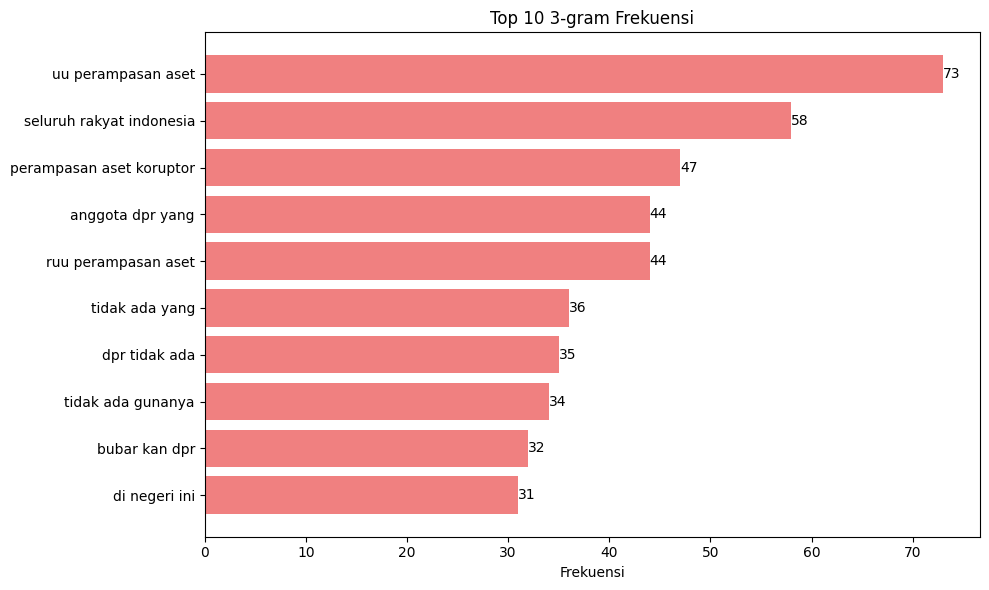

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

def plot_ngram_frequencies(texts, ngram_range=(3,3), top_n =10, color='skyblue'):
  vectorize = CountVectorizer(ngram_range = ngram_range)
  X = vectorize.fit_transform(texts)

  ngram_counts = X.sum(axis=0).A1
  ngram_vocab = vectorize.get_feature_names_out()
  freq_dist = dict(zip(ngram_vocab, ngram_counts))

  top_ngrams = Counter(freq_dist).most_common(top_n)
  labels, values = zip(*top_ngrams)

  plt.figure(figsize=(10, 6))
  bars = plt.barh(labels[::-1], values[::-1], color=color)
  plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
  plt.xlabel('Frekuensi')

  for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', ha='left', va='center')

  plt.tight_layout()
  plt.show()

plot_ngram_frequencies(df['normalisasi'], ngram_range=(3,3), top_n=10, color = 'lightcoral')

In [14]:
def tokenize(text):
  tokens = text.split()
  return tokens
df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,comment,cleaning,case_folding,normalisasi,tokenize
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,\n,\n,\n,[]
1,Hajar terus pejabat korup bakarrr,Hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr,"[hajar, terus, pejabat, korup, bakarrr]"
2,Semoga cepat selesai masalahnya,Semoga cepat selesai masalahnya,semoga cepat selesai masalahnya,semoga cepat selesai masalahnya,"[semoga, cepat, selesai, masalahnya]"
3,"Matane dalang"" di bahas terus jls"" kontenya ng...",Matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...,"[matane, dalang, di, bahas, terus, jls, konten..."
4,Gak malu pak pol gajimu d bayar rakyat kok ber...,Gak malu pak pol gajimu d bayar rakyat kok ber...,gak malu pak pol gajimu d bayar rakyat kok ber...,tidak malu pak pol gajimu di bayar rakyat kok ...,"[tidak, malu, pak, pol, gajimu, di, bayar, rak..."


In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['remove_stopwords'] = df['tokenize'].apply(lambda x: " ". join(remove_stopwords(x)))
df.head(5)

,comment,cleaning,case_folding,normalisasi,tokenize,remove_stopwords
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,\n,\n,\n,[],
1,Hajar terus pejabat korup bakarrr,Hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr,"[hajar, terus, pejabat, korup, bakarrr]",hajar pejabat korup bakarrr
2,Semoga cepat selesai masalahnya,Semoga cepat selesai masalahnya,semoga cepat selesai masalahnya,semoga cepat selesai masalahnya,"[semoga, cepat, selesai, masalahnya]",semoga cepat selesai
3,"Matane dalang"" di bahas terus jls"" kontenya ng...",Matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...,"[matane, dalang, di, bahas, terus, jls, konten...",matane dalang bahas jls kontenya ngarah dalang...
4,Gak malu pak pol gajimu d bayar rakyat kok ber...,Gak malu pak pol gajimu d bayar rakyat kok ber...,gak malu pak pol gajimu d bayar rakyat kok ber...,tidak malu pak pol gajimu di bayar rakyat kok ...,"[tidak, malu, pak, pol, gajimu, di, bayar, rak...",malu pol gajimu bayar rakyat berani rakyat


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['rt'] not in stop_words.
  warnings.warn(


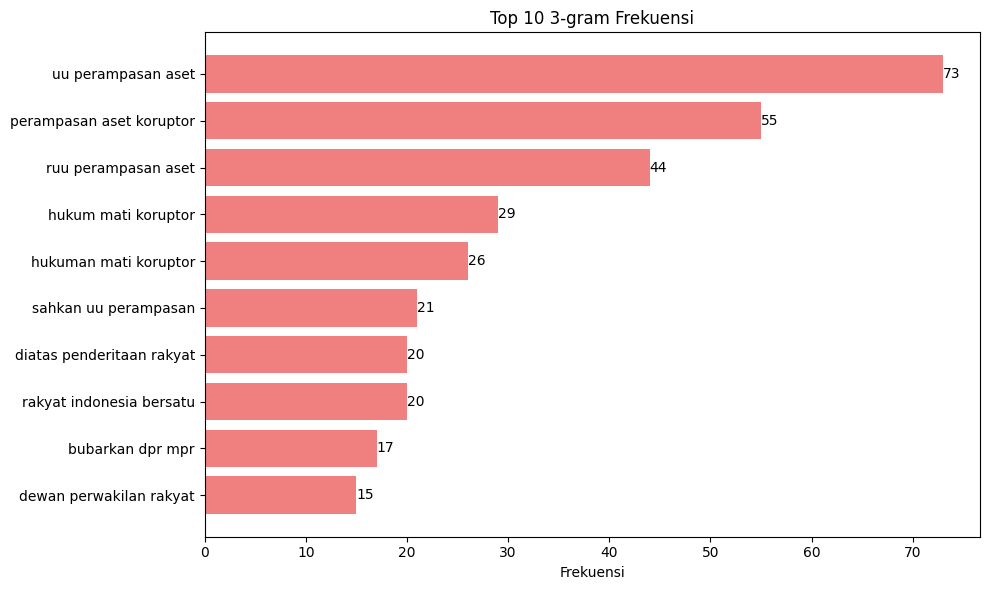

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

custom_stopwords = [
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs',
    'kayak', 'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga',
    'update', 'apk', 'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir'
]

def plot_ngram_frequencies(texts, ngram_range=(3,3), top_n=15, color='skyblue'):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=custom_stopwords)
    X = vectorizer.fit_transform(texts)

    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=color)
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    for bar in bars:
      width = bar.get_width()
      plt.text(width, bar.get_y()+ bar.get_height()/2, f'{width}', ha='left', va='center')

    plt.tight_layout()
    plt.show()

plot_ngram_frequencies(df['remove_stopwords'], ngram_range=(3,3), top_n=10, color='lightcoral')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7313 entries, 0 to 7486
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           7313 non-null   object
 1   cleaning          7313 non-null   object
 2   case_folding      7313 non-null   object
 3   normalisasi       7313 non-null   object
 4   tokenize          7313 non-null   object
 5   remove_stopwords  7313 non-null   object
dtypes: object(6)
memory usage: 399.9+ KB


In [19]:
data = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7313 entries, 0 to 7486
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           7313 non-null   object
 1   cleaning          7313 non-null   object
 2   case_folding      7313 non-null   object
 3   normalisasi       7313 non-null   object
 4   tokenize          7313 non-null   object
 5   remove_stopwords  7313 non-null   object
dtypes: object(6)
memory usage: 399.9+ KB


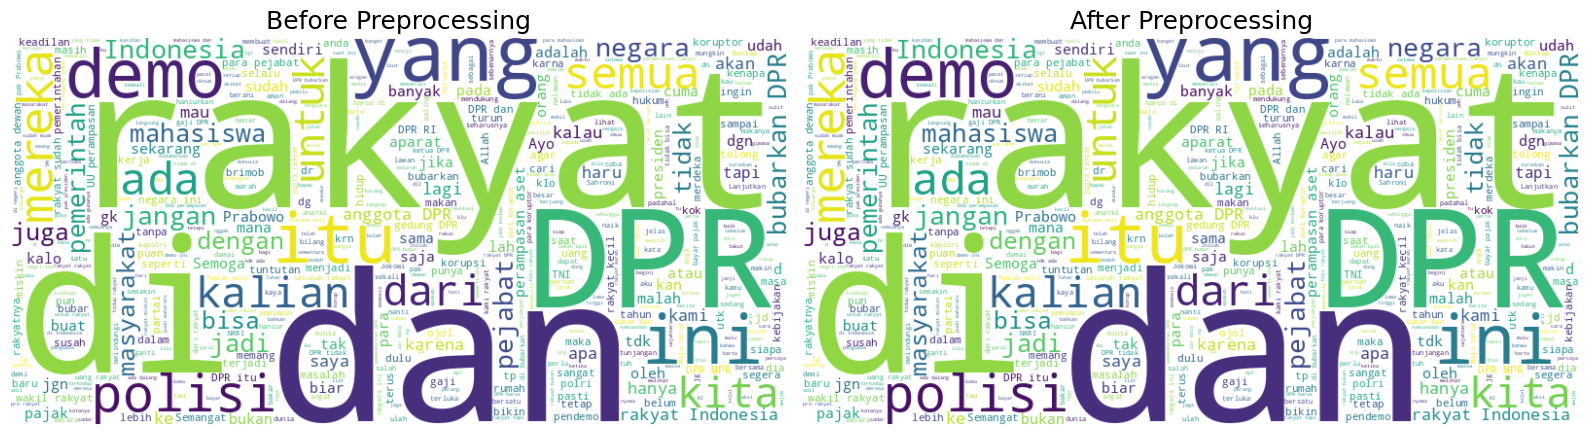

In [20]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs',
    'kayak', 'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga',
    'update', 'apk', 'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir'
])

text_before=' '.join(
    data['comment']
    .astype(str)
    .tolist()
)

wc_before = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=500,
    width=800,
    height=400
).generate(text_before)

text_after = ' '.join(
    [" ".join(eval(x) if isinstance(x, str) and x.startswith('[') else x.split())
    for x in data['remove_stopwords'].astype(str)]
)

wc_after = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=500,
    width=800,
    height=400
).generate(text_after)

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis('off')
plt.title('Before Preprocessing', fontsize =18)
plt.subplot(1,2,2)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis('off')
plt.title('After Preprocessing', fontsize =18)
plt.tight_layout()
plt.show()


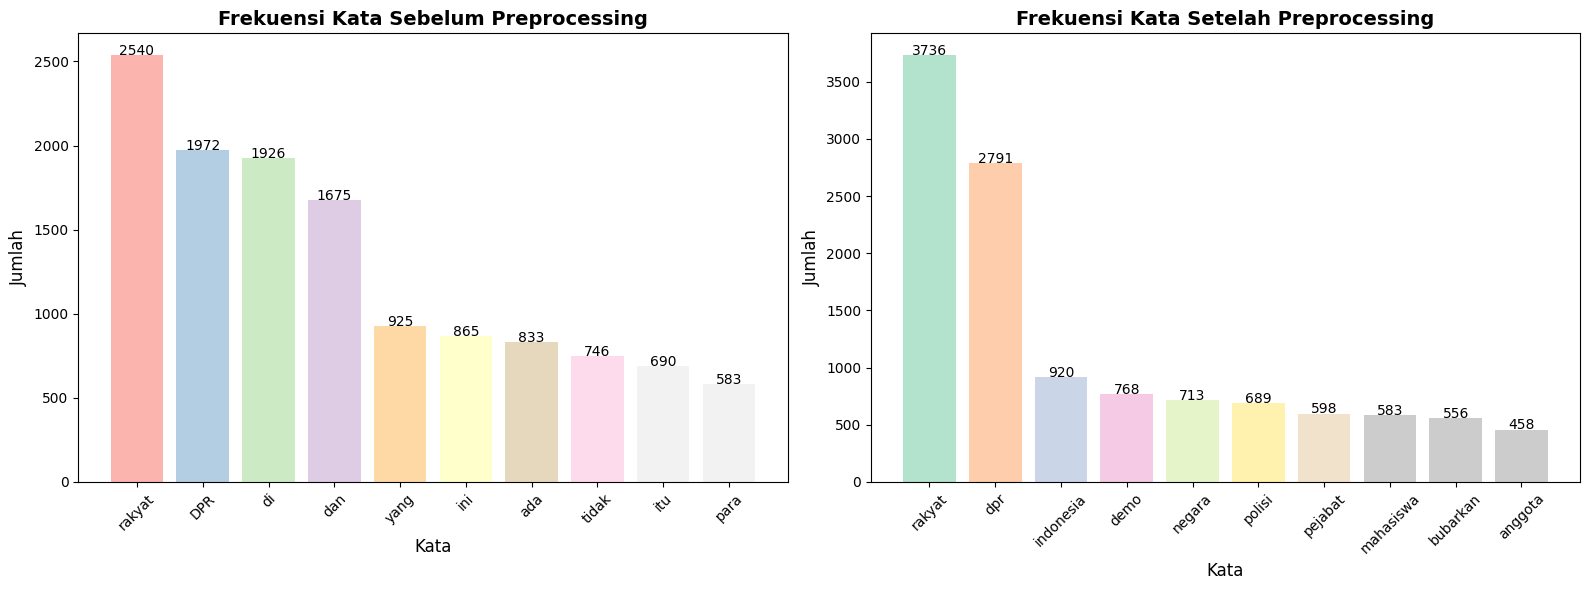

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update([
    'https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'cs',
    'kayak', 'nih', 'termul', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga',
    'update', 'apk', 'ajar', 'si', 'ok', 'gas', 'omon', 'nyinyir'
])

def clean_text_column(series):
    cleaned = []
    for text in series.astype(str):
        # Hapus [ ], tanda petik tunggal/ganda, koma
        text = re.sub(r"[\[\]\'\",]", "", text)
        cleaned.append(text.strip())
    return " ".join(cleaned)

all_text_before = clean_text_column(data["comment"])
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

all_text_after = clean_text_column(data["remove_stopwords"])
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()


In [22]:
df.to_csv('Hasil_preprocessing_data.csv', encoding='utf8', index = False)

## Pelabelan Data Metode Laxicon Based

In [23]:
data = pd.read_csv('Hasil_preprocessing_data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   comment           7313 non-null   object
 1   cleaning          7267 non-null   object
 2   case_folding      7267 non-null   object
 3   normalisasi       7267 non-null   object
 4   tokenize          7313 non-null   object
 5   remove_stopwords  7249 non-null   object
dtypes: object(6)
memory usage: 342.9+ KB


,comment,cleaning,case_folding,normalisasi,tokenize,remove_stopwords
0,🚓🚐🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🏍🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐🚐...,\n,\n,\n,[],NaN
1,Hajar terus pejabat korup bakarrr,Hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr,hajar terus pejabat korup bakarrr,"['hajar', 'terus', 'pejabat', 'korup', 'bakarrr']",hajar pejabat korup bakarrr
2,Semoga cepat selesai masalahnya,Semoga cepat selesai masalahnya,semoga cepat selesai masalahnya,semoga cepat selesai masalahnya,"['semoga', 'cepat', 'selesai', 'masalahnya']",semoga cepat selesai
3,"Matane dalang"" di bahas terus jls"" kontenya ng...",Matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...,matane dalang di bahas terus jls kontenya ngar...,"['matane', 'dalang', 'di', 'bahas', 'terus', '...",matane dalang bahas jls kontenya ngarah dalang...
4,Gak malu pak pol gajimu d bayar rakyat kok ber...,Gak malu pak pol gajimu d bayar rakyat kok ber...,gak malu pak pol gajimu d bayar rakyat kok ber...,tidak malu pak pol gajimu di bayar rakyat kok ...,"['tidak', 'malu', 'pak', 'pol', 'gajimu', 'di'...",malu pol gajimu bayar rakyat berani rakyat


In [24]:
data = pd.DataFrame(data[['remove_stopwords']])
data.head(5)

,remove_stopwords
0,NaN
1,hajar pejabat korup bakarrr
2,semoga cepat selesai
3,matane dalang bahas jls kontenya ngarah dalang...
4,malu pol gajimu bayar rakyat berani rakyat


In [25]:
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep='\t', header=None)[0])

def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        sentiment = "Negatif" if sentiment_score <= 0 else "Positif"
        return sentiment_score, sentiment
    return 0, "Negatif"
data[['Score', 'Sentiment']] = data['remove_stopwords'].apply(lambda x: pd.Series(determine_sentiment(x)))
data.head(5)

,remove_stopwords,Score,Sentiment
0,NaN,0,Negatif
1,hajar pejabat korup bakarrr,-3,Negatif
2,semoga cepat selesai,0,Negatif
3,matane dalang bahas jls kontenya ngarah dalang...,0,Negatif
4,malu pol gajimu bayar rakyat berani rakyat,-1,Negatif


/tmp/ipython-input-4088536291.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


<Figure size 800x600 with 0 Axes>

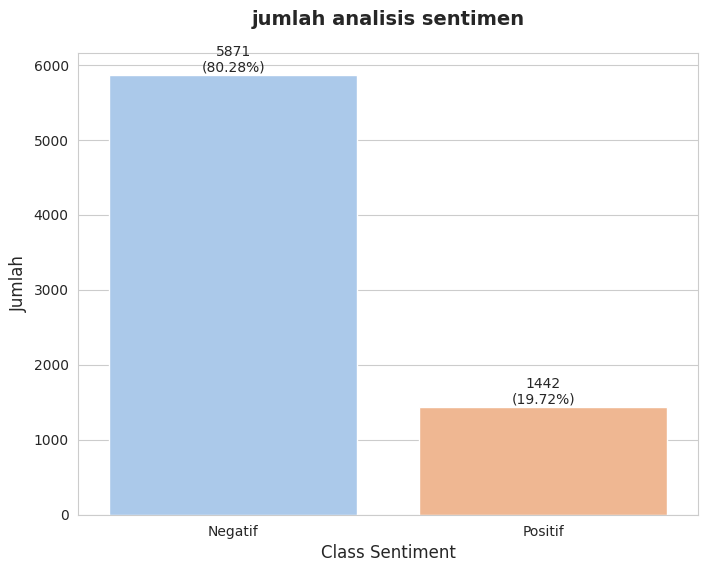

In [26]:
import seaborn as sns

sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('jumlah analisis sentimen', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_counts.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom', fontsize=10)

plt.show()


In [27]:
data.to_csv('Hasil_Labelling_Data.csv', encoding='utf8', index=False)

## Aspect-Based Sentiment Classification (ABSC)

In [28]:
data = pd.read_csv('Hasil_Labelling_Data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   remove_stopwords  7249 non-null   object
 1   Score             7313 non-null   int64 
 2   Sentiment         7313 non-null   object
dtypes: int64(1), object(2)
memory usage: 171.5+ KB


,remove_stopwords,Score,Sentiment
0,NaN,0,Negatif
1,hajar pejabat korup bakarrr,-3,Negatif
2,semoga cepat selesai,0,Negatif
3,matane dalang bahas jls kontenya ngarah dalang...,0,Negatif
4,malu pol gajimu bayar rakyat berani rakyat,-1,Negatif


In [29]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 1 to 7312
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   remove_stopwords  7249 non-null   object
 1   Score             7249 non-null   int64 
 2   Sentiment         7249 non-null   object
dtypes: int64(1), object(2)
memory usage: 226.5+ KB


In [30]:
data = pd.DataFrame(data[['remove_stopwords', 'Sentiment']])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 1 to 7312
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   remove_stopwords  7249 non-null   object
 1   Sentiment         7249 non-null   object
dtypes: object(2)
memory usage: 169.9+ KB


In [31]:
aspect_keywords = {
"Ahmad Sahroni": [
    "sahroni",
    "roni",
    "bang roni",
    "ahmad",
    "bro sahroni",
    "bang sahroni",
    "roni priok",
    "ketua roni",
    "bos roni",
    "sahron"
],
"Nafa Urbach": [
    "nafa",
    "urbach",
    "mba nafa",
    "kak nafa",
    "nafa artis",
    "bunda nafa",
    "sis nafa",
    "tante nafa",
    "urba",
    "nona nafa"
],
"Eko Patrio": [
    "eko",
    "patrio",
    "eko patrio",
    "bang eko",
    "mas eko",
    "pak eko",
    "komeng eko",
    "om eko",
    "eko purnomo",
    "bos patrio"
],
"Uya Kuya": [
    "uya",
    "kuya",
    "uya kuya",
    "bang uya",
    "om uya",
    "mas uya",
    "pak uya",
    "surya",
    "uya entertainer",
    "bos uya"
],
"Adies Kadir": [
    "adies",
    "kadir",
    "bang adies",
    "pak adies",
    "mas adies",
    "bos adies",
    "kadir golkar",
    "adis",
    "ketua adies",
    "om adies"
],

}
all_aspects = list(aspect_keywords.keys())
counter = 0

def aspect_extraction(text):
  global counter
  for aspect, keywords in aspect_keywords.items():
    if any(keyword in text for keyword in keywords):
      return aspect
  aspect = all_aspects[counter % len(all_aspects)]
  counter += 1
  return aspect
data['aspect_extraction'] = data['remove_stopwords'].astype(str).apply(aspect_extraction)
data.head(20)

,remove_stopwords,Sentiment,aspect_extraction
1,hajar pejabat korup bakarrr,Negatif,Ahmad Sahroni
2,semoga cepat selesai,Negatif,Nafa Urbach
3,matane dalang bahas jls kontenya ngarah dalang...,Negatif,Eko Patrio
4,malu pol gajimu bayar rakyat berani rakyat,Negatif,Uya Kuya
5,bikin ricuh dpr ya dilindungi dpr ya hadehhhhh,Positif,Adies Kadir
6,dpr,Negatif,Ahmad Sahroni
7,play for indonesian,Negatif,Nafa Urbach
8,babi,Negatif,Eko Patrio
9,indonesia semprot berubah kayak ya finish berb...,Negatif,Uya Kuya
10,mohon maaf panik mengawal kendaraan didepo,Negatif,Adies Kadir


/tmp/ipython-input-2072852080.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


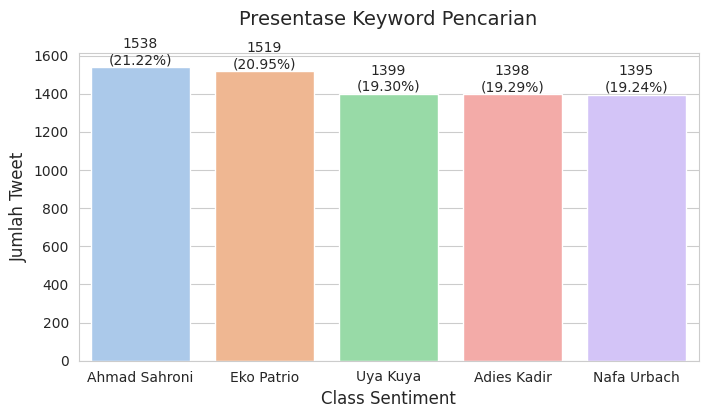

In [32]:
sentiment_count = data['aspect_extraction'].value_counts()
sns.set_style('whitegrid')

fig, ax =  plt.subplots(figsize=(8, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title("Presentase Keyword Pencarian", fontsize=14, pad=20)
plt.xlabel("Class Sentiment", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)

total = len(data['aspect_extraction'])
for i, count in enumerate(sentiment_count.values):
  percentage = f'{100 * count / total:.2f}%'
  ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom', fontsize=10)

plt.show()

In [33]:
data.to_csv('Hasil_Extraction_Data.csv', encoding='utf8', index=False)

## Splitting Data

In [34]:
file_path = 'Hasil_Extraction_Data.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   remove_stopwords   7249 non-null   object
 1   Sentiment          7249 non-null   object
 2   aspect_extraction  7249 non-null   object
dtypes: object(3)
memory usage: 170.0+ KB


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

cleaned_data = data.dropna(subset=['remove_stopwords'])

X = cleaned_data['remove_stopwords']
y = cleaned_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

print("Jumlah data latih", len(X_train))
print("Jumlah data uji", len(X_test))
print("==========================")

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

X_train_vectorized.shape, X_test_vectorized.shape




Jumlah data latih 5799
Jumlah data uji 1450


((5799, 12611), (1450, 12611))

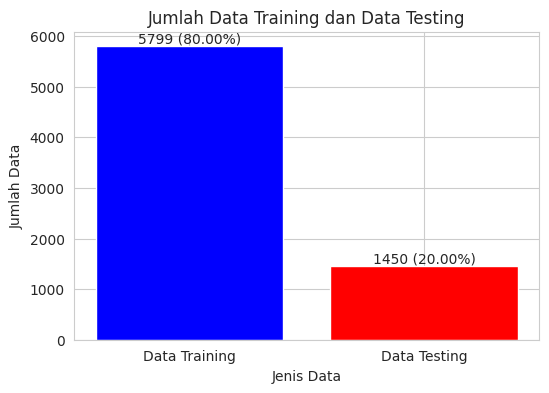

In [37]:
train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6,4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'red'])

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)', ha='center', va='bottom')
plt.title('Jumlah Data Training dan Data Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

In [43]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# === TRAINING & EVALUATION ===
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

result = {}

for model_name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    result[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


Confusion Matrix for SVM:


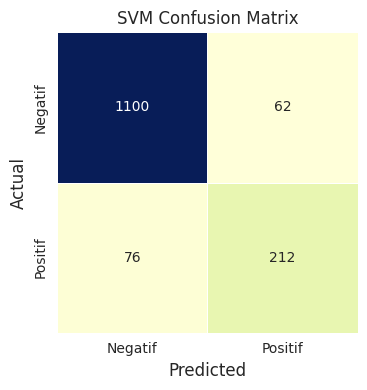


Confusion Matrix for KNN:


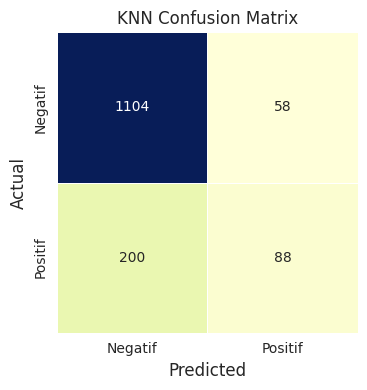


Confusion Matrix for Naive Bayes:


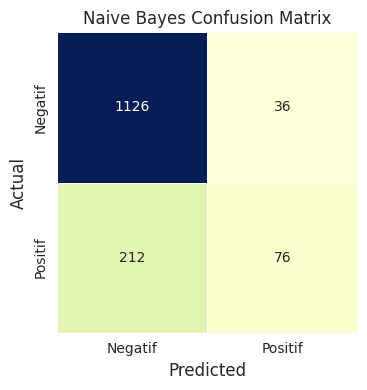


Confusion Matrix for Random Forest:


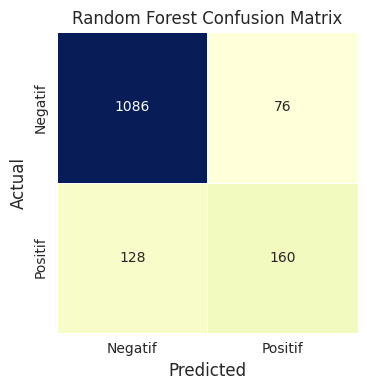


Confusion Matrix for Decision Tree:


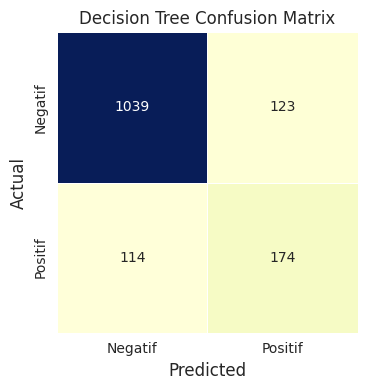


Confusion Matrix for Neural Network:


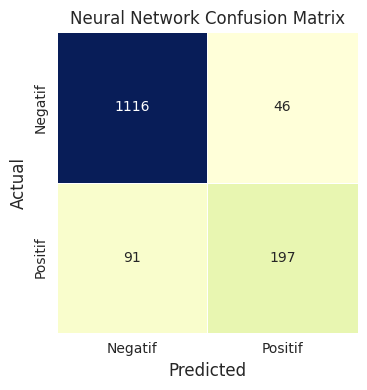

In [44]:
for model_name, model_result in result.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        model_result['confusion_matrix'],
        annot=True,
        fmt='d',
        cmap='YlGnBu',
        cbar=False,
        xticklabels=['Negatif', 'Positif'],
        yticklabels=['Negatif', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )
    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f"{model_name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    plt.tight_layout()
    plt.show()

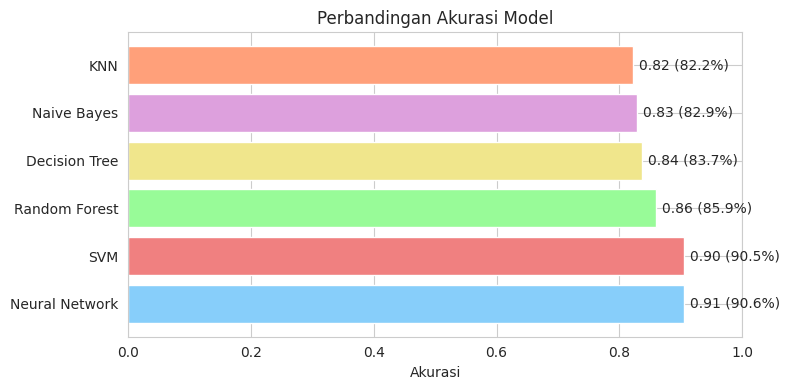

In [46]:
accuracies = {model: result_data['accuracy'] for model, result_data in result.items()}
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

bright_colors = [
    'lightskyblue', 'lightcoral', 'palegreen', 'khaki', 'plum',
    'lightsalmon', 'mediumturquoise', 'wheat'
]
num_models = len(sorted_accuracies)
colors = bright_colors[:num_models] if num_models <= len(bright_colors) else bright_colors * (num_models // len(bright_colors) + 1)

plt.figure(figsize=(8, 4))
bars = plt.barh(
    list(sorted_accuracies.keys()),    # <-- ubah jadi barh (horizontal)
    list(sorted_accuracies.values()),
    color=colors[:num_models]
)

# Tambahkan label di ujung bar
for bar in bars:
    accuracy = bar.get_width()
    plt.text(
        accuracy + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{accuracy:.2f} ({accuracy * 100:.1f}%)',
        ha='left',
        va='center',
        fontsize=10
    )

plt.title("Perbandingan Akurasi Model")
plt.xlabel("Akurasi")
plt.xlim(0, 1)  # karena akurasi hanya antara 0–1
plt.tight_layout()
plt.show()


In [47]:
from IPython.display import display

for model_name, model_result in result.items():
    print(f"Classification Report for {model_name}:")
    report_df = pd.DataFrame(model_result['classification_report']).transpose()
    style_df = report_df.style.background_gradient(cmap='coolwarm')
    style_df = style_df.format(precision=2)
    display(style_df)


Classification Report for SVM:


,precision,recall,f1-score,support
Negatif,0.94,0.95,0.94,1162.00
Positif,0.77,0.74,0.75,288.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.85,0.84,0.85,1450.00
weighted avg,0.90,0.90,0.90,1450.00


Classification Report for KNN:


,precision,recall,f1-score,support
Negatif,0.85,0.95,0.90,1162.00
Positif,0.60,0.31,0.41,288.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.72,0.63,0.65,1450.00
weighted avg,0.80,0.82,0.80,1450.00


Classification Report for Naive Bayes:


,precision,recall,f1-score,support
Negatif,0.84,0.97,0.90,1162.00
Positif,0.68,0.26,0.38,288.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.76,0.62,0.64,1450.00
weighted avg,0.81,0.83,0.80,1450.00


Classification Report for Random Forest:


,precision,recall,f1-score,support
Negatif,0.89,0.93,0.91,1162.00
Positif,0.68,0.56,0.61,288.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.79,0.75,0.76,1450.00
weighted avg,0.85,0.86,0.85,1450.00


Classification Report for Decision Tree:


,precision,recall,f1-score,support
Negatif,0.90,0.89,0.90,1162.00
Positif,0.59,0.60,0.59,288.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.74,0.75,0.75,1450.00
weighted avg,0.84,0.84,0.84,1450.00


Classification Report for Neural Network:


,precision,recall,f1-score,support
Negatif,0.92,0.96,0.94,1162.00
Positif,0.81,0.68,0.74,288.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.87,0.82,0.84,1450.00
weighted avg,0.90,0.91,0.90,1450.00
